# Análise Exploratória de Dados - Titanic (https://www.kaggle.com/c/titanic/)

## Leitura das bibliotecas gerais

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Conjunto de dados

### Leitura e exploração inicial

In [2]:
# Leitura
df = pd.read_csv('kaggle_titanic_train.csv')

In [3]:
# Dimensões
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Rápida descrição
# Atributo Meta: Survived - Se o passageiro sobreviveu (=1) ou não (=0)
# PassengerId: Identificação dada a cada passageiro
# PClass: Classe do passageiro (Valores possíveis: 1, 2, 3 - Primeira, Segunda e Terceira Classe)
# Name, Sex Age: Nome, sexo e idade do passageiro
# SibSp: número de irmãos e cônjuges viajando com o passageiro
# Parch: número de pais e filhos viajando com o passageiro
# Ticket: número do ticket do passageiro
# Fare: preço do ticket pago pelo passageiro
# Cabin: código da cabine do passageiro
# Embarked: local onde passageiro embarcou (S - Southampton, C - Cherbourg and Q - Queenstown)

### Estatística dos dados

In [5]:
# Estatística dos dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Valores faltantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Distribuição de sobreviventes
df.Survived.value_counts(1)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Sobreviventes por sexo

In [8]:
# Distribuição de sobreviventes por sexo
df.groupby('Sex').Survived.value_counts(1)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

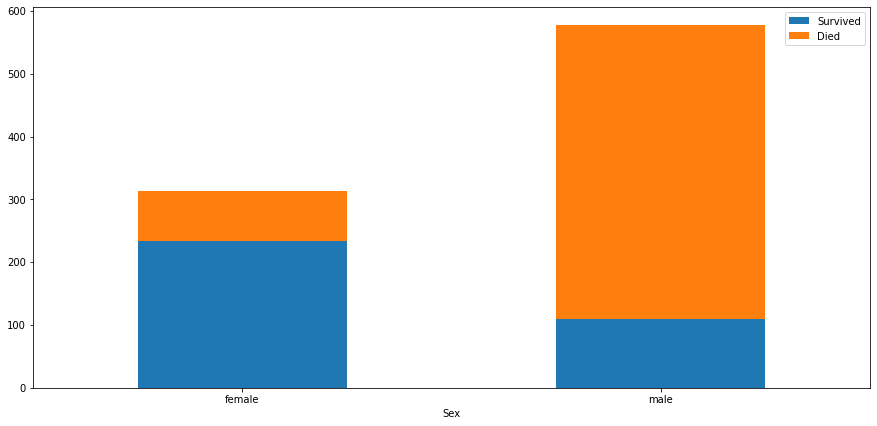

In [10]:
# Visualização gráfica da distribuição de sobreviventes por sexo (valores absolutos)
df['Died']=1-df['Survived']
df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                        figsize=(15,7),
                                                        stacked=True,
                                                        rot=0);

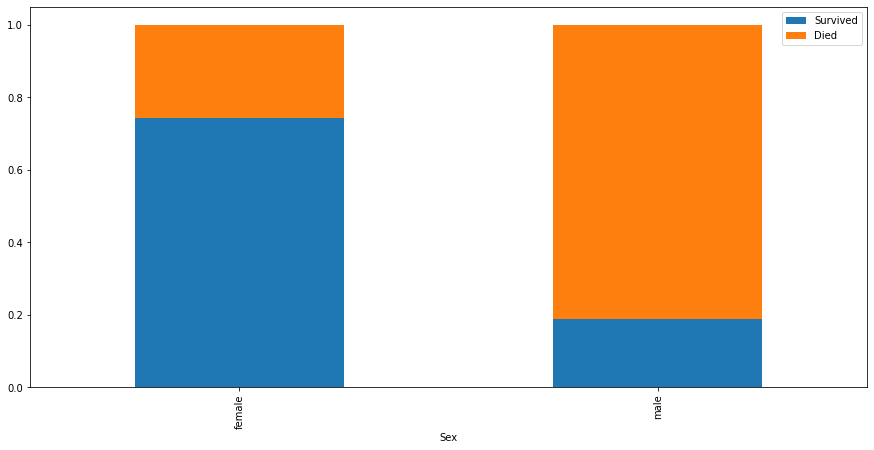

In [11]:
# Visualização gráfica da distribuição de sobreviventes por sexo (proporção percentual)
df['Died']=1-df['Survived']
df.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar',
                                                        figsize=(15,7),
                                                        stacked=True);

### Sobreviventes por idade

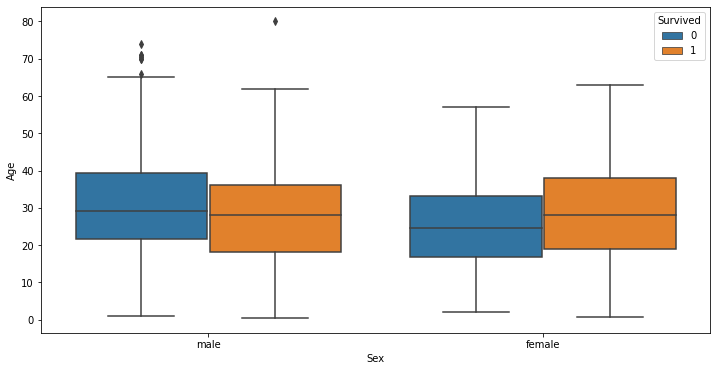

In [12]:
# Boxplot Sex, Age, Survived
fig = plt.figure(figsize=(12,6))
sns.boxplot(x=df.Sex, y=df.Age, hue=df.Survived);

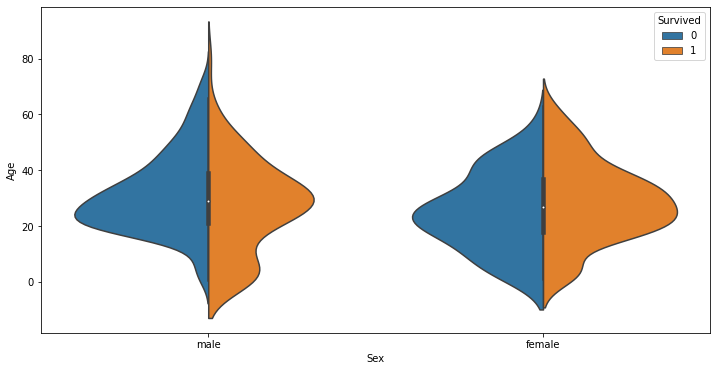

In [13]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x=df.Sex, 
               y=df.Age, 
               hue=df.Survived,
               split=True);

### Sobreviventes por preço da passagem

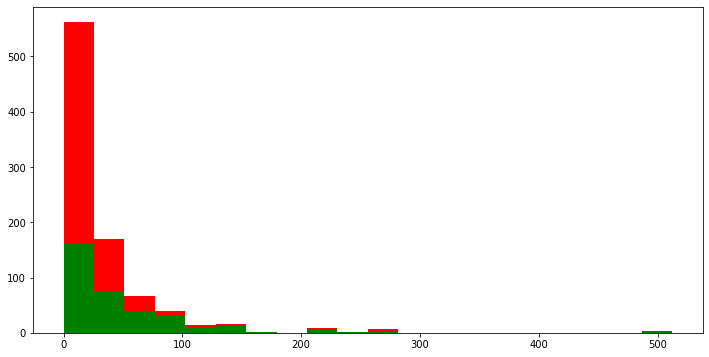

In [14]:
surv = df['Survived'] == 1
nonsurv = df['Survived'] == 0

grupo1 = df[surv]['Fare']
grupo2 = df[nonsurv]['Fare']
lbl = ['Survived', 'Dead']

# fig = plt.figure(figsize=(12,6))
# plt.hist([df[surv]['Fare'], df[nonsurv]['Fare']], 
#         stacked=True, color = ['g','r'],
#         bins = 20, label = ['Survived','Dead']);

fig = plt.figure(figsize=(12,6))
plt.hist([grupo1,grupo2], 
         stacked=True, color = ['g','r'],
         bins = 20, label=lbl);         

### Sobreviventes por local de embarque e preço do ticket

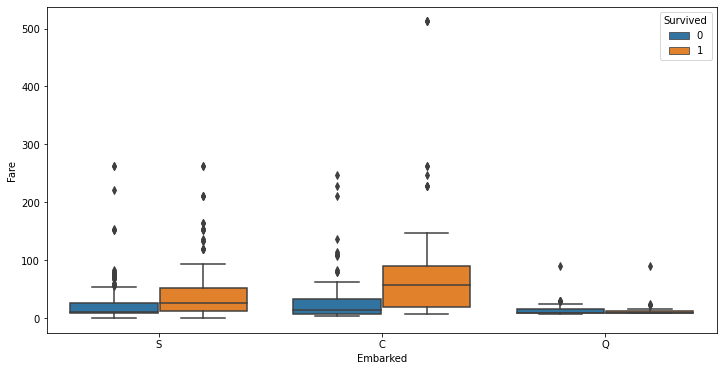

In [15]:
# Boxplot Embarked, Fare, Survived
fig = plt.figure(figsize=(12,6))
sns.boxplot(x=df.Embarked, y=df.Fare, hue=df.Survived);

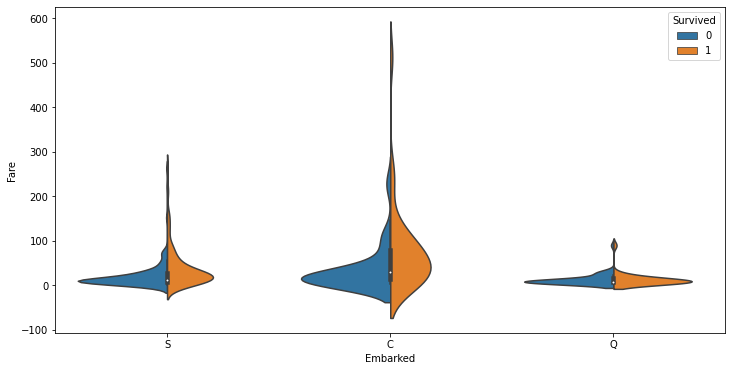

In [16]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x=df.Embarked, 
               y=df.Fare, 
               hue=df.Survived,
               split=True);

# Explorando os dados
* Corrigindo
* Alterando

## Alterar títulos dos passageiros (Mr., Miss, Dona., Master, etc.)
* Hipótese: Pode haver relação entre sobreviventes e títulos

In [17]:
df.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [18]:
name = df.Name[0]
name

'Braund, Mr. Owen Harris'

In [23]:
name.split(',')[1].split('.')[0].strip()

'Mr'

In [24]:
titles = set()
for name in df.Name:
  titles.add(name.split(',')[1].split('.')[0].strip())

In [25]:
print(titles)

{'Col', 'Mrs', 'Master', 'Sir', 'Ms', 'Miss', 'Mme', 'Jonkheer', 'Mr', 'Don', 'Mlle', 'Major', 'Lady', 'Capt', 'Dr', 'the Countess', 'Rev'}


In [26]:
Title_Dictionary = {"Capt": "Officer",
                    "Col": "Officer",
                    "Major": "Officer",
                    "Jonkheer": "Royalty",
                    "Don": "Royalty",
                    "Sir" : "Royalty",
                    "Dr": "Officer",
                    "Rev": "Officer",
                    "the Countess":"Royalty",
                    "Mme": "Mrs",
                    "Mlle": "Miss",
                    "Ms": "Mrs",
                    "Mr" : "Mr",
                    "Mrs" : "Mrs",
                    "Miss" : "Miss",
                    "Master" : "Master",
                    "Lady" : "Royalty"
                    }

In [27]:
# Criar atributo com título de cada registro
df['Title'] = aux = df.Name.map(lambda name:name.split(',')[1].split('.')[0].strip())
df['Title'] = df.Title.map(Title_Dictionary)

In [28]:
# Quantos títulos existem?
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [29]:
# Quantos registros em cada título?
df.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [ ]:
# ATENÇÃO!!! Conjunto de Treino x Teste. Verificar valores faltantes em título no conjunto de teste

## Idade - Preencher dados faltantes
* Preencher pela média ou mediana - NÃO PARECE SER BOA IDEIA
* Idade provavelmente deve ser diferente para grupos e categorias diferentes de passageiros

In [31]:
# Agrupar passageiros por classes, sexo e título

grupo_idade = df.groupby(['Sex','Pclass','Title']).Age
grupo_idade_mediana = grupo_idade.median()
grupo_idade_mediana = grupo_idade_mediana.reset_index()[['Sex','Pclass','Title','Age']]

In [33]:
# DataFrame com os grupos e idade média de cada grupo
grupo_idade_mediana

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mr,40.0


In [34]:
# Quantas grupos?
grupo_idade_mediana.shape

(17, 4)

In [35]:
# Preencher dados faltantes de idade segundo essa tabela, que indica as médias para as combinações 'Sex', 'Pclass', 'Title'
def fill_age(row):
    condition = (
        (grupo_idade_mediana['Sex'] == row['Sex']) & 
        (grupo_idade_mediana['Title'] == row['Title']) & 
        (grupo_idade_mediana['Pclass'] == row['Pclass'])) 
    return grupo_idade_mediana[condition]['Age'].values[0]

df.Age = df.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis = 1)

In [36]:
# Verificar dados faltantes em Age
df.Age.isnull().sum()

0

## Eliminar a coluna 'Name'. Vamos usar a coluna 'Title'

In [37]:
df.drop('Name', axis=1, inplace=True)
# df = df.drop('Name', axis=1)

In [ ]:
df.head()

## One-Hot-Encode para o atributo 'Title'

In [39]:
title_dummies = pd.get_dummies(df.Title)
title_dummies.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [41]:
df = pd.concat([df,title_dummies], axis=1)
df.drop('Title',axis=1,inplace=True)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,0,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0,0,0


In [43]:
# Verificar tipos de variáveis para cada atributo
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Died             int64
Master           uint8
Miss             uint8
Mr               uint8
Mrs              uint8
Officer          uint8
Royalty          uint8
dtype: object